In [206]:
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
cwd = os.getcwd()
collection = "cryptopunks"

In [207]:
# Load in pickle file containing dict of seller transactions
pickleLocation = cwd + "/" + collection + ".pkl"
if (not os.path.exists(pickleLocation)):
    print("ERROR: " + pickleLocation + " DOES NOT EXIST")
    quit()
inFile = open(pickleLocation, "rb")
sellerTxns = pickle.load(inFile)
inFile.close()

In [208]:
# Read in buyers & sellers associated with each transaction
readIn = ['winner_account_address', 'seller_address']
buyersLocation = cwd + "/data/" + collection + ".csv"
if (not os.path.exists(buyersLocation)):
    print("ERROR: " + buyersLocation + " DOES NOT EXIST")
    quit()
nftSales = pd.read_csv(buyersLocation, usecols = readIn)
nftSales.dropna(subset=['seller_address'], inplace=True)

In [209]:
# List to store buyers that received ETH from sellers
# Stored as buyer, seller
buyersSellers = []

for index, row in nftSales.iterrows():
    for addr in sellerTxns[row['seller_address']]:

        # If the address from txn list is the one who bought the NFT and received ETH...
        if(addr == row['winner_account_address'] and
        sellerTxns[row['seller_address']][addr] == "sent"):
                buyersSellers.append(tuple((addr, row['seller_address'])))

In [210]:
# Write list of suspicious buyers/sellers to file
outFileLoc = cwd + "/chain_analysis_results/" + collection + "_results.txt" 
outFile = open(outFileLoc, "w+")
for pair in buyersSellers:
    line = ' '.join(str(tmp) for tmp in pair)
    outFile.write(line + '\n')
if len(buyersSellers) > 0:
    print("/chain_analysis_results/" + collection + "_results.txt successfully written")
else:
    print(collection + " sellers did not send ETH to buyers")
outFile.close()

/chain_analysis_results/cryptopunks_results.txt successfully written


In [211]:
# Make list of sellers with dupes removed, make array with number of nonoffenders & offenders
print(len(nftSales.index))
#allSellers = nftSales['seller_address'].drop_duplicates(keep='first')
data = np.array([len(nftSales.index) - len(buyersSellers), len(buyersSellers)])
print(data[1])
#print(len(allSellers.index))
pieLabels = ["Did not send ETH to buyer (" + str(data[0]) + ")", "Sent ETH to buyer (" + str(data[1]) + ")"]

15226
12918


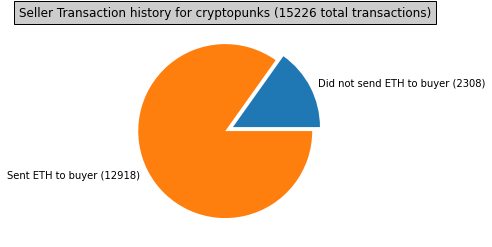

In [212]:
# Display pie chart of results
plt.pie(data, labels=pieLabels, explode=explode)
plt.title("Seller Transaction history for " + collection +  " (" + str(len(nftSales.index)) + " total transactions)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()